# Import dataset

In [1]:
import pandas as pd
import numpy as np
import json
from pandas.io.json import json_normalize
import pickle
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

#set folder path
folder = 'data'
#fd = folder + '/uncorrupted_signal_folder'
#fd_km = fd + '/Clusters4096'
fd = folder
fd_km = fd

In [2]:
data_train = pd.read_pickle(fd_km + '/data_train_v1').reset_index().iloc[:,1:] #full set
data_test = pd.read_pickle(fd_km + '/data_test_v1').reset_index().iloc[:,1:]  

In [3]:
data_train

,ID,cycle,gauge1,gauge2,gauge3,RUL
0,1,0,0.000684,0.000693,0.000695,68053
1,1,500,0.000684,0.000693,0.000695,67553
2,1,1000,0.000684,0.000693,0.000695,67053
3,1,1500,0.000684,0.000693,0.000695,66553
4,1,2000,0.000684,0.000693,0.000695,66053
...,...,...,...,...,...,...
1385078,10000,66500,0.000118,0.000253,0.000761,2393
1385079,10000,67000,0.000097,0.000186,0.000755,1893
1385080,10000,67500,0.000078,0.000113,0.000743,1393
1385081,10000,68000,0.000060,0.000037,0.000718,893


In [4]:
data_train[data_train.ID == 1]

,ID,cycle,gauge1,gauge2,gauge3,RUL
0,1,0,0.000684,0.000693,0.000695,68053
1,1,500,0.000684,0.000693,0.000695,67553
2,1,1000,0.000684,0.000693,0.000695,67053
3,1,1500,0.000684,0.000693,0.000695,66553
4,1,2000,0.000684,0.000693,0.000695,66053
...,...,...,...,...,...,...
132,1,66000,0.000095,0.000178,0.000754,2053
133,1,66500,0.000078,0.000112,0.000743,1553
134,1,67000,0.000062,0.000044,0.000721,1053
135,1,67500,0.000047,-0.000022,0.000684,553


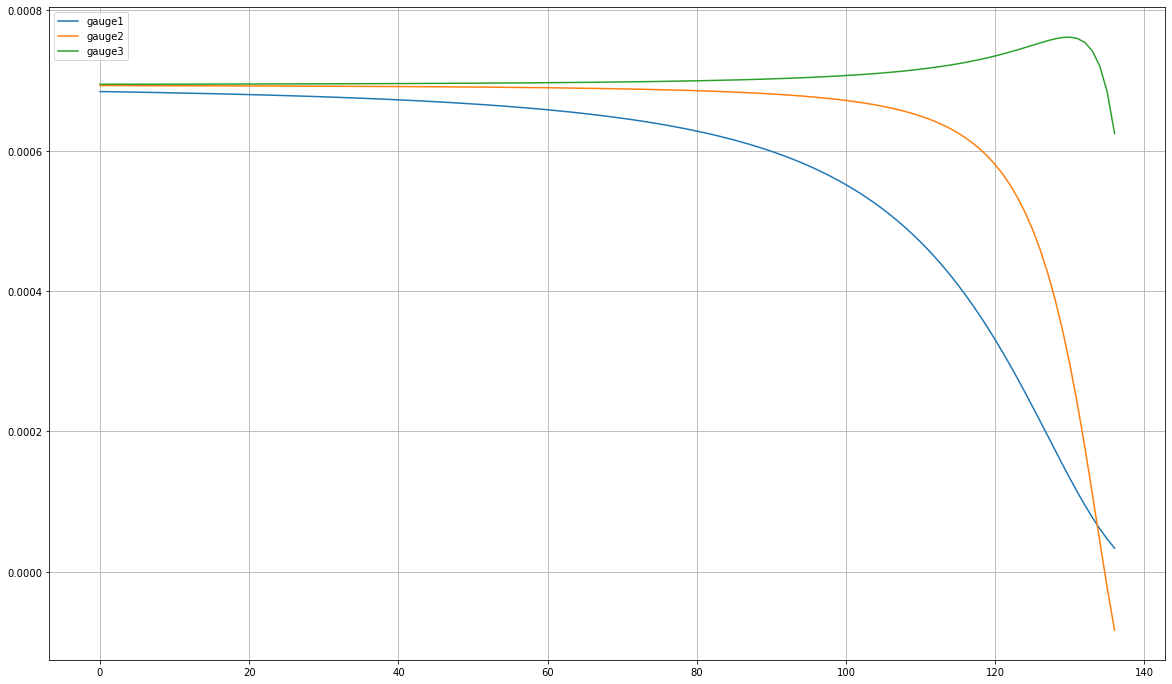

In [5]:
plt.figure(figsize=(20, 12))
plt.plot(data_train[data_train.ID == 1]['gauge1'],label= 'gauge1')
plt.plot(data_train[data_train.ID == 1][ 'gauge2'],label= 'gauge2')
plt.plot(data_train[data_train.ID == 1]['gauge3'], label= 'gauge3')
plt.grid()
plt.legend()
plt.show()

In [6]:
data_train.head(10)

,ID,cycle,gauge1,gauge2,gauge3,RUL
0,1,0,0.000684,0.000693,0.000695,68053
1,1,500,0.000684,0.000693,0.000695,67553
2,1,1000,0.000684,0.000693,0.000695,67053
3,1,1500,0.000684,0.000693,0.000695,66553
4,1,2000,0.000684,0.000693,0.000695,66053
5,1,2500,0.000683,0.000693,0.000695,65553
6,1,3000,0.000683,0.000693,0.000695,65053
7,1,3500,0.000683,0.000693,0.000695,64553
8,1,4000,0.000683,0.000693,0.000695,64053
9,1,4500,0.000683,0.000693,0.000695,63553


In [7]:
data_test[data_test.ID==1]

,ID,cycle,gauge1,gauge2,gauge3,RUL
0,1,0,0.000684,0.000693,0.000695,64540
1,1,500,0.000684,0.000693,0.000695,64040
2,1,1000,0.000684,0.000693,0.000695,63540
3,1,1500,0.000684,0.000693,0.000695,63040
4,1,2000,0.000684,0.000693,0.000695,62540
5,1,2500,0.000684,0.000693,0.000695,62040
6,1,3000,0.000683,0.000693,0.000695,61540
7,1,3500,0.000683,0.000693,0.000695,61040
8,1,4000,0.000683,0.000693,0.000695,60540
9,1,4500,0.000683,0.000693,0.000695,60040


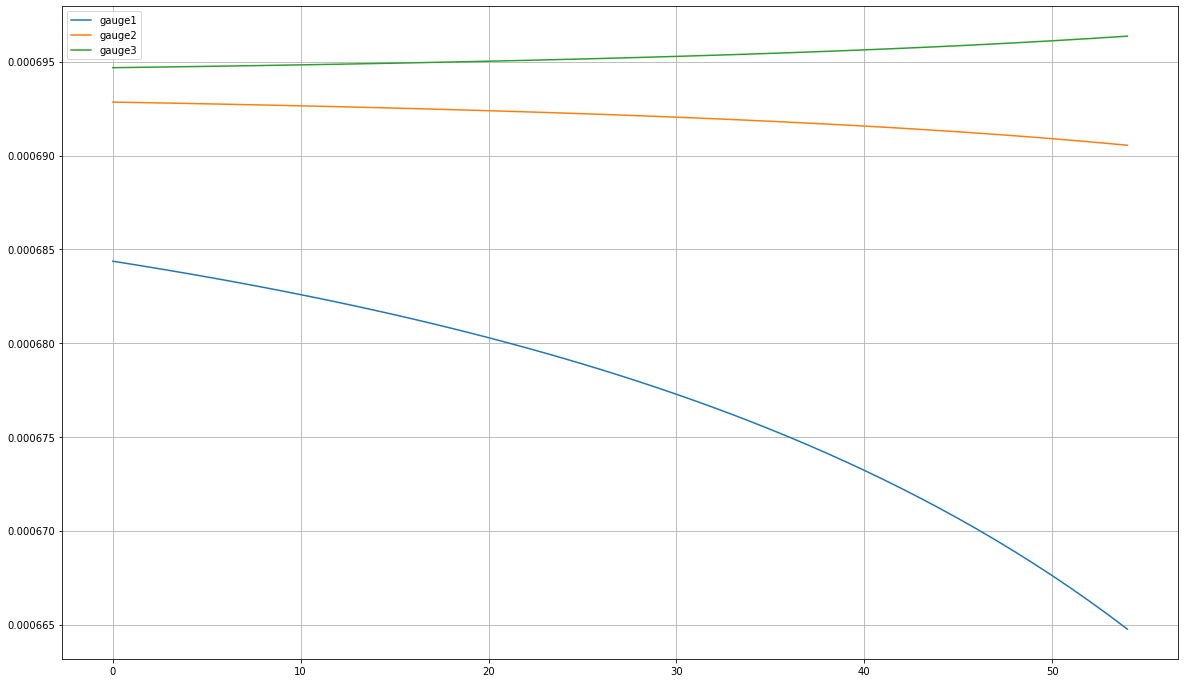

In [8]:
plt.figure(figsize=(20, 12))
plt.plot(data_test[data_test.ID == 1]['gauge1'],label= 'gauge1')
plt.plot(data_test[data_test.ID == 1][ 'gauge2'],label= 'gauge2')
plt.plot(data_test[data_test.ID == 1]['gauge3'], label= 'gauge3')
plt.grid()
plt.legend()
plt.show()

# Categorise RUL data

In [9]:
print(data_train.RUL.describe())
print(data_test.RUL.describe())

count    1.385083e+06
mean     3.477047e+04
std      2.023644e+04
min      0.000000e+00
25%      1.731200e+04
50%      3.462700e+04
75%      5.193900e+04
max      8.189600e+04
Name: RUL, dtype: float64
count     8782.000000
mean     45427.648144
std      15643.733322
min       3964.000000
25%      34177.000000
50%      46891.000000
75%      57867.500000
max      79327.000000
Name: RUL, dtype: float64


[    0.           221.6066482    886.4265928   1994.4598338
  3545.70637119  5540.16620499  7977.83933518 10858.72576177
 14182.82548476 17950.13850416 22160.66481994 26814.40443213
 31911.35734072 37451.52354571 43434.90304709 49861.49584488
 56731.30193906 64044.32132964 71800.55401662 80000.
 81896.        ]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


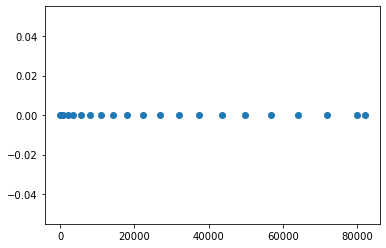

In [10]:
l=0.5
nb_bins = 20 # including one extra bin for RUL>upper_bin_bound
lower_bin_bound = 0
upper_bin_bound = 80000

bins = np.linspace(lower_bin_bound, upper_bin_bound**(1-l), nb_bins)**(1/l)
bins = np.append(bins, data_train.RUL.max())

labels=[i for i in range(bins.shape[0]-1)]
plt.plot(bins,np.full(bins.shape[0],0),'o')
print(bins)
print(labels)

In [11]:
data_train['RUL_bins'] = pd.cut(data_train['RUL'], bins=bins, labels=labels)
data_test['RUL_bins'] = pd.cut(data_test['RUL'], bins=bins, labels=labels)

In [12]:
data_train['RUL_bins'] = pd.cut(data_train['RUL'], bins=bins, labels=labels)
data_test['RUL_bins'] = pd.cut(data_test['RUL'], bins=bins, labels=labels)

In [13]:
display(data_train)
display(data_test) 

,ID,cycle,gauge1,gauge2,gauge3,RUL,RUL_bins
0,1,0,0.000684,0.000693,0.000695,68053,17
1,1,500,0.000684,0.000693,0.000695,67553,17
2,1,1000,0.000684,0.000693,0.000695,67053,17
3,1,1500,0.000684,0.000693,0.000695,66553,17
4,1,2000,0.000684,0.000693,0.000695,66053,17
...,...,...,...,...,...,...,...
1385078,10000,66500,0.000118,0.000253,0.000761,2393,3
1385079,10000,67000,0.000097,0.000186,0.000755,1893,2
1385080,10000,67500,0.000078,0.000113,0.000743,1393,2
1385081,10000,68000,0.000060,0.000037,0.000718,893,2


,ID,cycle,gauge1,gauge2,gauge3,RUL,RUL_bins
0,1,0,0.000684,0.000693,0.000695,64540,17
1,1,500,0.000684,0.000693,0.000695,64040,16
2,1,1000,0.000684,0.000693,0.000695,63540,16
3,1,1500,0.000684,0.000693,0.000695,63040,16
4,1,2000,0.000684,0.000693,0.000695,62540,16
...,...,...,...,...,...,...,...
8777,100,22000,0.000670,0.000691,0.000696,43346,13
8778,100,22500,0.000670,0.000691,0.000696,42846,13
8779,100,23000,0.000669,0.000691,0.000696,42346,13
8780,100,23500,0.000669,0.000691,0.000696,41846,13


# Build sequences

In [14]:
#utils 
nb_gauges = 3
data_tr = data_train[data_train.ID <= 100]
data_val = data_test[data_test.ID <= 100]

#prepare forecasting data
def gen_X_sequence(id_df, seq_length, seq_cols,timesteps_pred,  type_data = None):
    """ Only sequences that meet the window-length are considered, no padding is used. This means for testing
    we need to drop those which are below the window-length. An alternative would be to pad sequences so that
    we can use shorter ones """
    
    
    ind_start = 0
    
    data_array = id_df[seq_cols].values
    num_elements = data_array.shape[0]
    for start, stop in zip(range(0+ind_start, num_elements-seq_length+1-timesteps_pred), range(seq_length+ind_start, num_elements+1-timesteps_pred)):
        yield data_array[start:stop, :]
 

def gen_Y_sequence(id_df, seq_length, seq_cols,timesteps_pred, type_data = None):
    """ Only sequences that meet the window-length are considered, no padding is used. This means for testing
    we need to drop those which are below the window-length. An alternative would be to pad sequences so that
    we can use shorter ones """
    
    
    ind_start = 0
    
    data_array = id_df[seq_cols].values
    num_elements = data_array.shape[0]
    for start, stop in zip(range(0+ind_start, num_elements-seq_length+1-timesteps_pred), range(seq_length+ind_start, num_elements+1-timesteps_pred)):
        yield data_array[stop-1, :]#data_array[start+1:stop+1, :]
   



 #prepare data
seq_cols =  ['gauge'+str(i) for i in range(1,4)]#['label'+str(i) for i in range(1,4)]
seq_cols1 =  ['RUL_bins']
sequence_length = 30
timesteps_pred = 1



#training set
seq_gen = (list(gen_X_sequence(data_tr[data_tr['ID']==id], sequence_length, seq_cols, timesteps_pred, type_data= 'train')) 
                   for id in data_tr['ID'].unique())
# generate sequences and convert to numpy array
dbX = np.concatenate(list(seq_gen))



seq_gen = (list(gen_Y_sequence(data_tr[data_tr['ID']==id], sequence_length, seq_cols1, timesteps_pred, type_data= 'train')) 
                   for id in data_tr['ID'].unique())
# generate sequences and convert to numpy array
dbY = np.concatenate(list(seq_gen))#.reshape(-1,)

# add one dimension
# dbX = dbX[..., np.newaxis]

print(dbX.shape)
print(dbY.shape)

#test set
seq_gen = (list(gen_X_sequence(data_val[data_val['ID']==id], sequence_length, seq_cols, timesteps_pred, type_data= 'train')) 
                   for id in data_val['ID'].unique())
# generate sequences and convert to numpy array
dbX_val = np.concatenate(list(seq_gen))

seq_gen = (list(gen_Y_sequence(data_val[data_val['ID']==id], sequence_length, seq_cols1, timesteps_pred, type_data= 'train')) 
                   for id in data_val['ID'].unique())
# generate sequences and convert to numpy array
dbY_val = np.concatenate(list(seq_gen))#.reshape(-1,)

# add one dimension
# dbX_val = dbX_val[..., np.newaxis]

# dbX_val = (dbX_val + 1)/2
# dbY_val = (dbY_val + 1)/2
print(dbX_val.shape)
print(dbY_val.shape)

(10956, 30, 3)
(10956, 1)
(5782, 30, 3)
(5782, 1)


# One-hot encoding

In [15]:
from tensorflow.keras.utils import to_categorical

dbY = to_categorical(dbY,nb_bins)
dbY_val = to_categorical(dbY_val,nb_bins)

dbY = dbY[..., np.newaxis]
dbY_val = dbY_val[..., np.newaxis]

print(dbY.shape)
print(dbY_val.shape)

(10956, 20, 1)
(5782, 20, 1)


# Build model

In [16]:
#pip install keras-tcn --no-dependencies
#pip install tensorflow_addons

In [17]:
import numpy as np
from keras import backend as K
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, LSTM, Conv1D, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Input, Activation
from keras import optimizers
from keras.optimizers import Adam
from tcn import TCN, tcn_full_summary, compiled_tcn

In [18]:
input_layer = Input(shape=(dbX.shape[1], dbX.shape[2]))

x = TCN(nb_filters=20, kernel_size=6, nb_stacks=1, dilations=[2 ** i for i in range(6)], padding='causal',
            use_skip_connections=True, dropout_rate=0.05, return_sequences=False,
            activation='relu', kernel_initializer='he_normal', use_batch_norm=False, use_layer_norm=False,
            use_weight_norm=True, name='TCN')(input_layer)

x = Dense(dbY.shape[1])(x)
x = Activation('softmax')(x)
output_layer = x
model = Model(input_layer, output_layer)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [19]:
opt = Adam(learning_rate=0.002)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [20]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 30, 3)]           0         
_________________________________________________________________
TCN (TCN)                    (None, 20)                54332     
_________________________________________________________________
dense (Dense)                (None, 20)                420       
_________________________________________________________________
activation (Activation)      (None, 20)                0         
Total params: 54,752
Trainable params: 27,740
Non-trainable params: 27,012
_________________________________________________________________


In [21]:
dbY.argmax(axis=1)

array([[15],
       [15],
       [15],
       ...,
       [ 2],
       [ 2],
       [ 1]], dtype=int64)

In [22]:
batch_size = 32
epochs = 100
history = model.fit(dbX, dbY.argmax(axis=1), batch_size=batch_size, epochs=epochs, verbose=2, validation_data=(dbX_val, dbY_val.argmax(axis=1)))

Epoch 1/100
343/343 - 10s - loss: 1.8183 - accuracy: 0.2894 - val_loss: 1.3351 - val_accuracy: 0.5123
Epoch 2/100
343/343 - 7s - loss: 1.2387 - accuracy: 0.4562 - val_loss: 1.0783 - val_accuracy: 0.5083
Epoch 3/100
343/343 - 7s - loss: 1.1346 - accuracy: 0.4973 - val_loss: 1.0915 - val_accuracy: 0.4523
Epoch 4/100
343/343 - 7s - loss: 1.0048 - accuracy: 0.5538 - val_loss: 0.9361 - val_accuracy: 0.5700
Epoch 5/100
343/343 - 7s - loss: 0.9465 - accuracy: 0.5897 - val_loss: 0.9146 - val_accuracy: 0.5860
Epoch 6/100
343/343 - 7s - loss: 0.9258 - accuracy: 0.5923 - val_loss: 0.9300 - val_accuracy: 0.6352
Epoch 7/100
343/343 - 7s - loss: 0.8900 - accuracy: 0.6047 - val_loss: 1.0449 - val_accuracy: 0.5163
Epoch 8/100
343/343 - 7s - loss: 0.8667 - accuracy: 0.6143 - val_loss: 0.8235 - val_accuracy: 0.6346
Epoch 9/100
343/343 - 7s - loss: 0.8306 - accuracy: 0.6378 - val_loss: 0.8350 - val_accuracy: 0.6342
Epoch 10/100
343/343 - 7s - loss: 0.8185 - accuracy: 0.6393 - val_loss: 0.8287 - val_accur

Epoch 82/100
343/343 - 9s - loss: 0.5816 - accuracy: 0.7390 - val_loss: 0.7649 - val_accuracy: 0.6441
Epoch 83/100
343/343 - 9s - loss: 0.5840 - accuracy: 0.7455 - val_loss: 0.7441 - val_accuracy: 0.6522
Epoch 84/100
343/343 - 9s - loss: 0.5803 - accuracy: 0.7436 - val_loss: 0.7088 - val_accuracy: 0.6816
Epoch 85/100
343/343 - 7s - loss: 0.5968 - accuracy: 0.7356 - val_loss: 0.7974 - val_accuracy: 0.6411
Epoch 86/100
343/343 - 7s - loss: 0.5919 - accuracy: 0.7332 - val_loss: 0.7891 - val_accuracy: 0.6308
Epoch 87/100
343/343 - 7s - loss: 0.5809 - accuracy: 0.7407 - val_loss: 0.9042 - val_accuracy: 0.5822
Epoch 88/100
343/343 - 8s - loss: 0.5863 - accuracy: 0.7379 - val_loss: 0.7591 - val_accuracy: 0.6479
Epoch 89/100
343/343 - 8s - loss: 0.5764 - accuracy: 0.7416 - val_loss: 0.7309 - val_accuracy: 0.6629
Epoch 90/100
343/343 - 7s - loss: 0.5903 - accuracy: 0.7398 - val_loss: 0.7268 - val_accuracy: 0.6672
Epoch 91/100
343/343 - 8s - loss: 0.5736 - accuracy: 0.7460 - val_loss: 0.8312 - v

In [23]:
model.evaluate(dbX_val, dbY_val.argmax(axis=1))

181/181 [==============================] - 2s 9ms/step - loss: 0.7468 - accuracy: 0.6577


[0.7468369007110596, 0.6577308773994446]

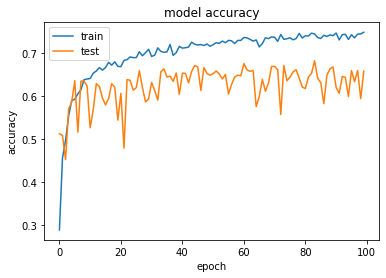

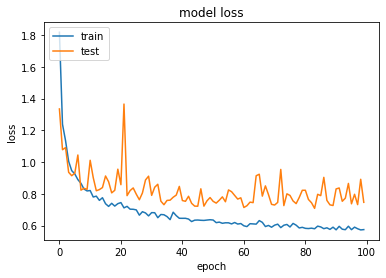

In [24]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
from datetime import datetime
dateTimeObj = datetime.now()
timestampStr = dateTimeObj.strftime("%d%m%Y%H%M%S")
model.save('PIR_CNN_Model3_2_' + timestampStr + '.h5')

In [26]:
model.predict(dbX_val[0:1])

array([[1.4384568e-13, 5.8804908e-06, 9.2619475e-06, 1.2277297e-05,
        3.9262817e-05, 1.3887174e-05, 1.0665653e-07, 1.4360807e-12,
        7.7210904e-11, 3.2095868e-11, 1.7619871e-13, 1.4800463e-11,
        1.6716122e-08, 2.7293019e-04, 1.1478400e-01, 7.3038352e-01,
        1.5447882e-01, 2.8898720e-13, 5.1728153e-13, 4.4422270e-12]],
      dtype=float32)

In [27]:
label = np.argmax(dbY_val[0])
print('The actual RUL is: ' + str(bins[label]) + '-' + str(bins[label+1]))
label = np.argmax(model.predict(dbX_val)[0])
print('The predicted RUL is: ' + str(bins[label]) + '-' + str(bins[label+1]))

The actual RUL is: 49861.495844875346-56731.30193905817
The predicted RUL is: 49861.495844875346-56731.30193905817


In [40]:
bins_average = np.zeros(bins.shape[0]-1)

for i in range(bins.shape[0]-1):
    bins_average[i] = (bins[i] + bins[i+1])/2

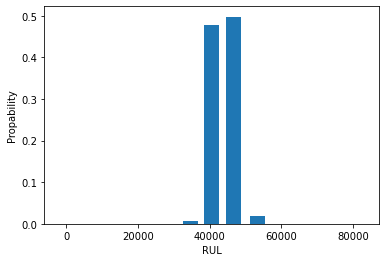

In [47]:
plt.bar(bins_average, model.predict(dbX_val[400:401])[0], bins[-1]/20)
plt.ylabel('Propability')
plt.xlabel('RUL')
plt.show()